In [70]:
import praw
from transformers import AutoTokenizer
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from twython import Twython
import json

In [71]:
with open('auth.json','r') as f:
    authentication = json.load(f)

In [72]:
import re

def clean_text(text):
    # remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)

    # remove links
    text = re.sub(r'http\S+', '', text)

    # remove words starting with '@' symbol
    text = re.sub(r'\b@\w+\b', '', text)

    # remove special characters and digits
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\b(rt|RT)\b', '', text)
    # convert text to lower case
    text = text.lower()
    text = re.sub(r'\b\w\b', '', text)
    return text.strip()

In [53]:

from twython import Twython




twitter = Twython(authentication["api_key"], authentication["api_secret"], authentication["access_token"], authentication["access_token_secret"])
        



# Get the trending hashtags for a specific location (here: worldwide)
trends = twitter.get_place_trends(id=23424977)  # 1 for global trends
hashtags = [trend['name'] for trend in trends[0]['trends']][:10]

tweets = {}

for hashtag in hashtags:
    search_results = twitter.search(q=hashtag, count=10, tweet_mode='extended')
    tweets[hashtag] = []
    for tweet in search_results['statuses']:

        tweets[hashtag].append(clean_text(tweet['full_text']))
     

In [54]:
import praw

reddit = praw.Reddit(client_id=authentication["reddit_client_id"],
                     client_secret=authentication["reddit_client_secret"],
                     user_agent=authentication["reddit_client_secret"],
 )

# get the 10 most popular subreddits
subreddits = reddit.subreddits.popular(limit=5)

# create an empty dictionary to store the posts
posts_dict = {}

# iterate over the popular subreddits and get their hot posts
for subreddit in subreddits:
    posts = subreddit.hot(limit=5)
    posts_list = []
    for post in posts:
        posts_list.append(clean_text(post.title))
    # add the list of posts to the dictionary with the subreddit name as the key
    posts_dict[subreddit.display_name] = posts_list

12w9feb
12wjgq0
12wsn8g
12wu3e7
12wx5dc
12whjgh
12w8qux
12wn0uo
12wju9h
12vxjcz
s1gd86
10g8tke
12wngc1
12wgynv
12webwg
12wqhvi
12wiq2w
12w9u1u
12walxb
12w974n
128efy3
128nbp3
12wicg4
12wmmef
12wokyx


In [77]:
from youtubesearchpython import *
from youtubesearchpython.__future__ import VideosSearch

videosSearch = VideosSearch('NoCopyrightSounds', limit = 2)
videosResult = await videosSearch.next()
comments_list = []

for v in videosResult['result']:
    comments = Comments(v['id'])
    while comments.hasMoreComments:
 
        comments.getNextComments()
        for i in (comments.comments["result"]):
            comments_list.append(clean_text(i['content']))
        if len(comments.comments["result"]) > 100:
            comments.hasMoreComments = False

[{'type': 'video', 'id': 'RJHKmEu0tIQ', 'title': 'Alan Walker - Dreamer (BEAUZ & Heleen Remix) [NCS Release]', 'publishedTime': '14 hours ago', 'duration': '2:05', 'viewCount': {'text': '92,030 views', 'short': '92K views'}, 'thumbnails': [{'url': 'https://i.ytimg.com/vi/RJHKmEu0tIQ/hq720.jpg?sqp=-oaymwEcCOgCEMoBSFXyq4qpAw4IARUAAIhCGAFwAcABBg==&rs=AOn4CLBtIeojGBKTniPRjk0s1-QCJLkEKg', 'width': 360, 'height': 202}, {'url': 'https://i.ytimg.com/vi/RJHKmEu0tIQ/hq720.jpg?sqp=-oaymwEcCNAFEJQDSFXyq4qpAw4IARUAAIhCGAFwAcABBg==&rs=AOn4CLAkCYSumcD_aLoCUT1AwrFSxphkFg', 'width': 720, 'height': 404}], 'richThumbnail': {'url': 'https://i.ytimg.com/an_webp/RJHKmEu0tIQ/mqdefault_6s.webp?du=3000&sqp=CPi9l6IG&rs=AOn4CLBAnhJDlM64Xl-c5JXFFdKBAE4fOA', 'width': 320, 'height': 180}, 'descriptionSnippet': [{'text': 'Subscribe to '}, {'text': 'NoCopyrightSounds', 'bold': True}, {'text': ' http://ncs.lnk.to/SubscribeYouTube WARNING - Contains flashing images.'}], 'channel': {'name': 'NoCopyrightSounds', 'id': 'U

In [81]:
from tensorflow.keras.models import load_model
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = load_model("whole_tweet_5_epochs_kaggle.h5")

In [80]:
def predict_sentiment(model, tokenizer, sentence):
    # Clean and preprocess the input sentence
    clean_sentence = clean_text(sentence)
    tokenized_sentence = tokenizer.encode(clean_sentence, add_special_tokens=True)
    padded_sentence = pad_sequences([tokenized_sentence], maxlen=72, dtype="long", 
                                     value=0, truncating="post", padding="post")
    # Predict the sentiment label
    predicted_label = model.predict(padded_sentence, verbose=0)
    return 1 if predicted_label[0][0][0] > 0.5 else 0

0 5


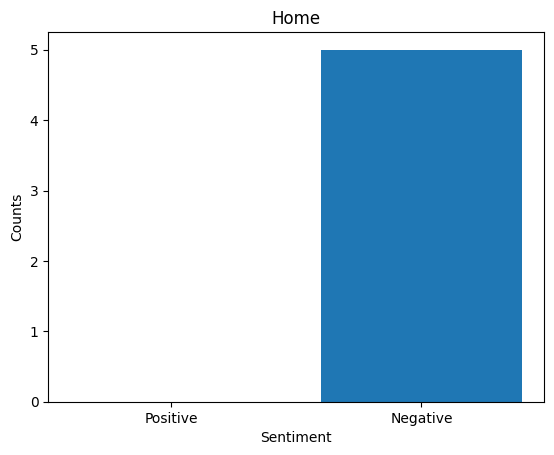

4 1


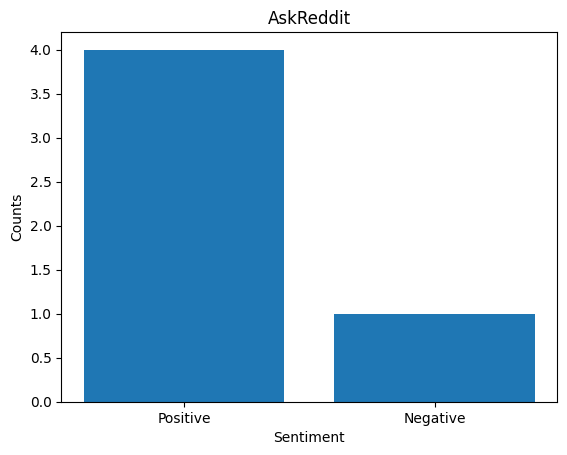

3 2


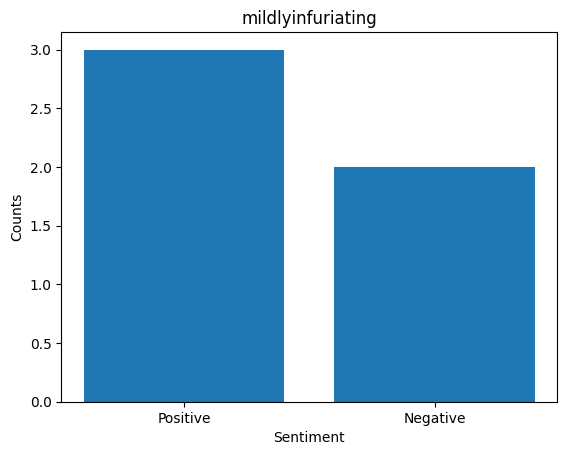

3 2


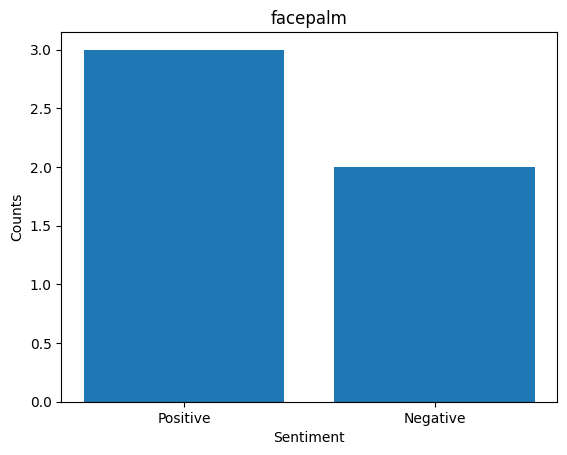

1 4


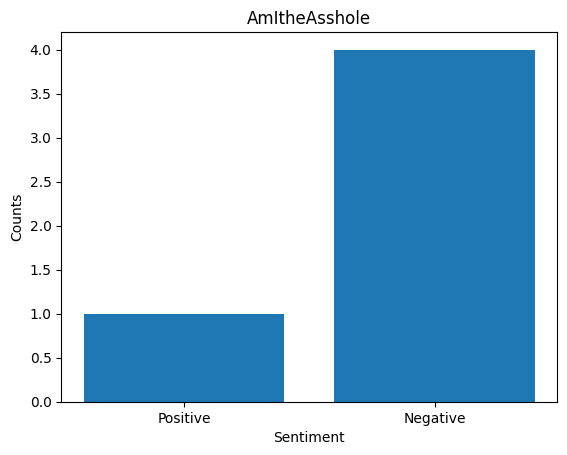

In [82]:
import matplotlib.pyplot as plt

for i in posts_dict.items():
    
    pos = 0
    neg = 0
    for j in i[1]:
        if predict_sentiment(model,tokenizer,j) == 1:
            pos += 1
        else:
            neg += 1
  
    print(pos, neg)
    x = ['Positive','Negative']
    y = [pos, neg]

    fig, ax = plt.subplots()
    ax.bar(x, y)

    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Counts')
    ax.set_title(i[0])

    plt.show()

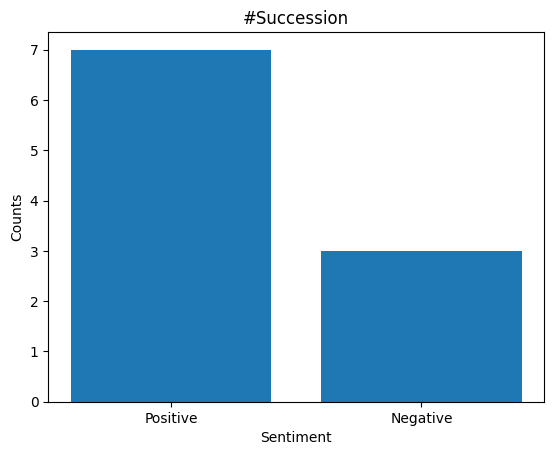

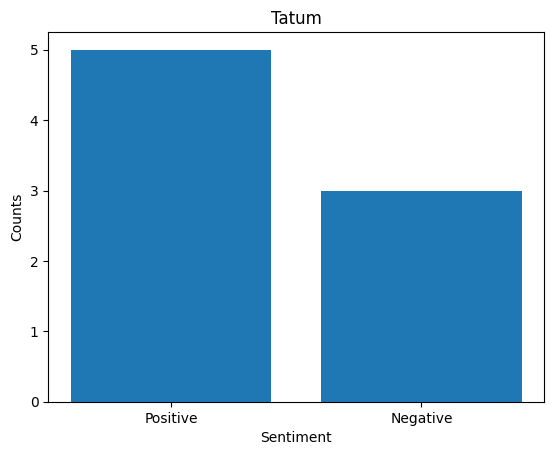

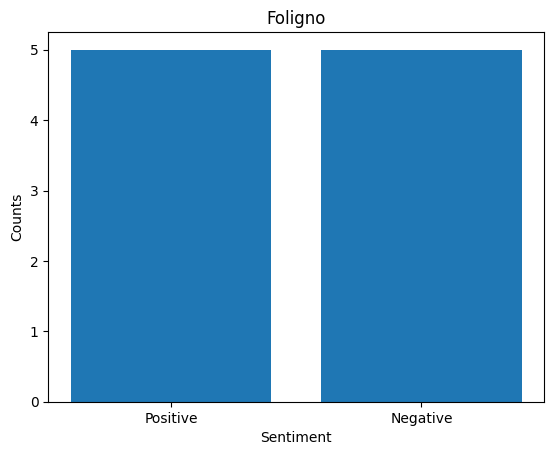

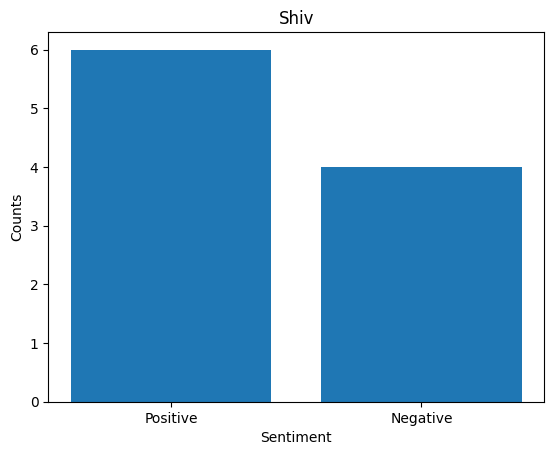

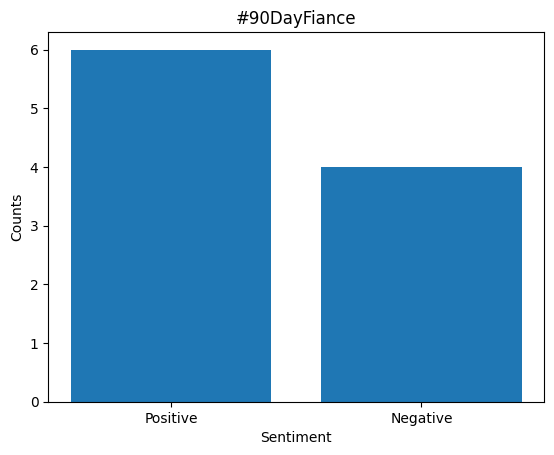

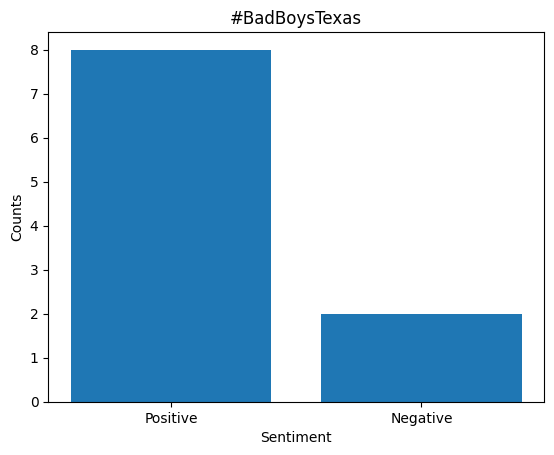

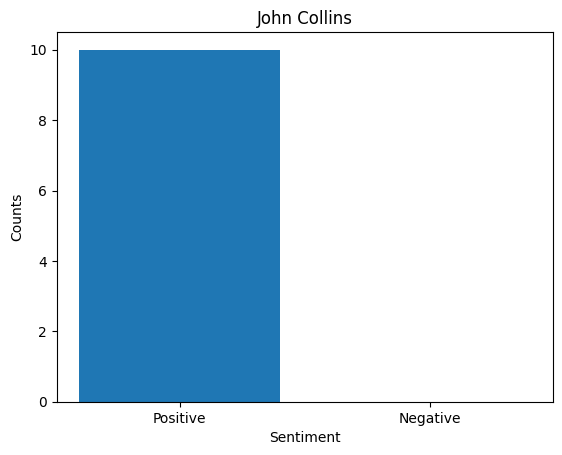

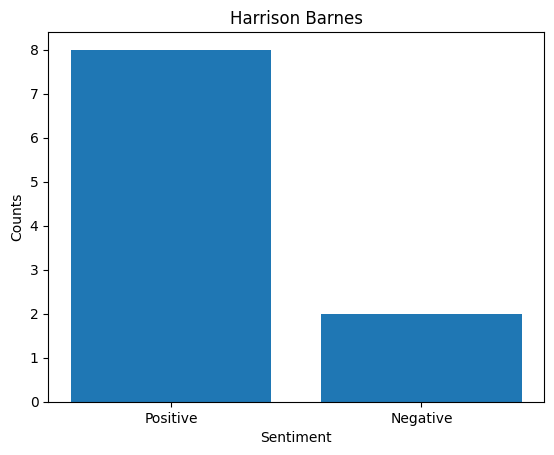

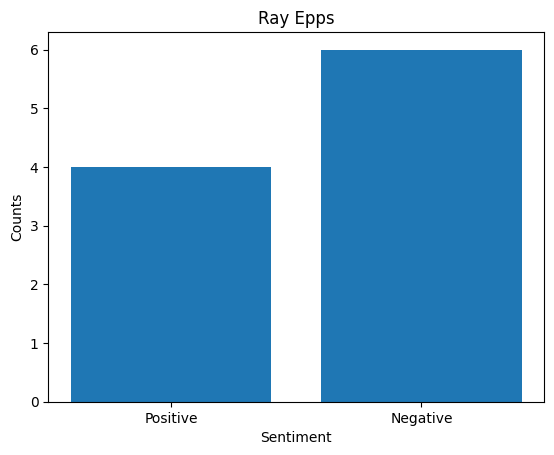

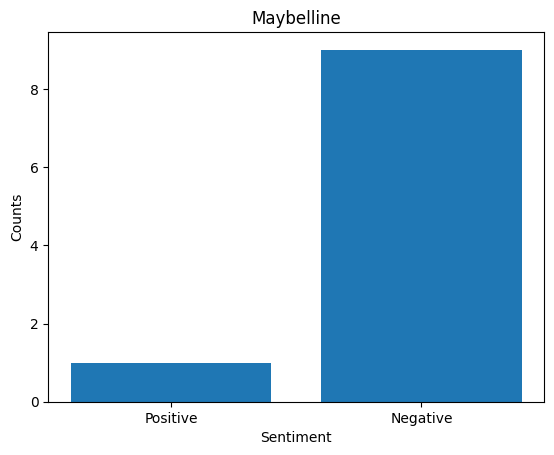

In [83]:
import matplotlib.pyplot as plt

for i in tweets.items():
    
    pos = 0
    neg = 0
    for j in i[1]:
        if predict_sentiment(model,tokenizer,j) == 1:
            pos += 1
        else:
            neg += 1
  

    x = ['Positive','Negative']
    y = [pos, neg]

    fig, ax = plt.subplots()
    ax.bar(x, y)

    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Counts')
    ax.set_title(i[0])

    plt.show()

587 213


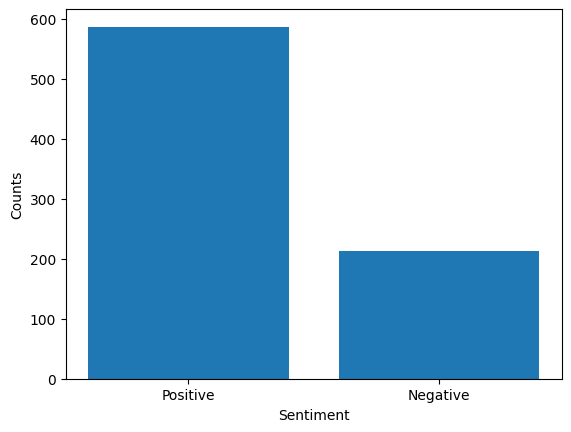

In [90]:
import matplotlib.pyplot as plt
pos = 0
neg = 0
for i in comments_list:

    if predict_sentiment(model,tokenizer,i) == 1:
        pos += 1
    else:
        neg += 1

x = ['Positive','Negative']
y = [pos, neg]
print(pos, neg)
fig, ax = plt.subplots()
ax.bar(x, y)

ax.set_xlabel('Sentiment')
ax.set_ylabel('Counts')


plt.show()
    


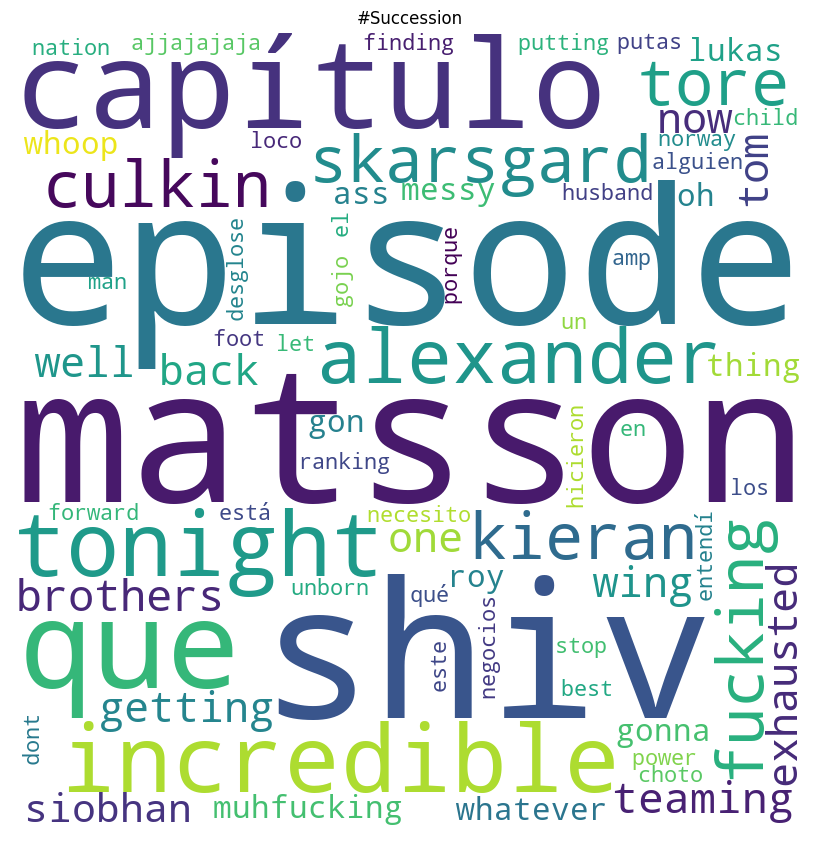

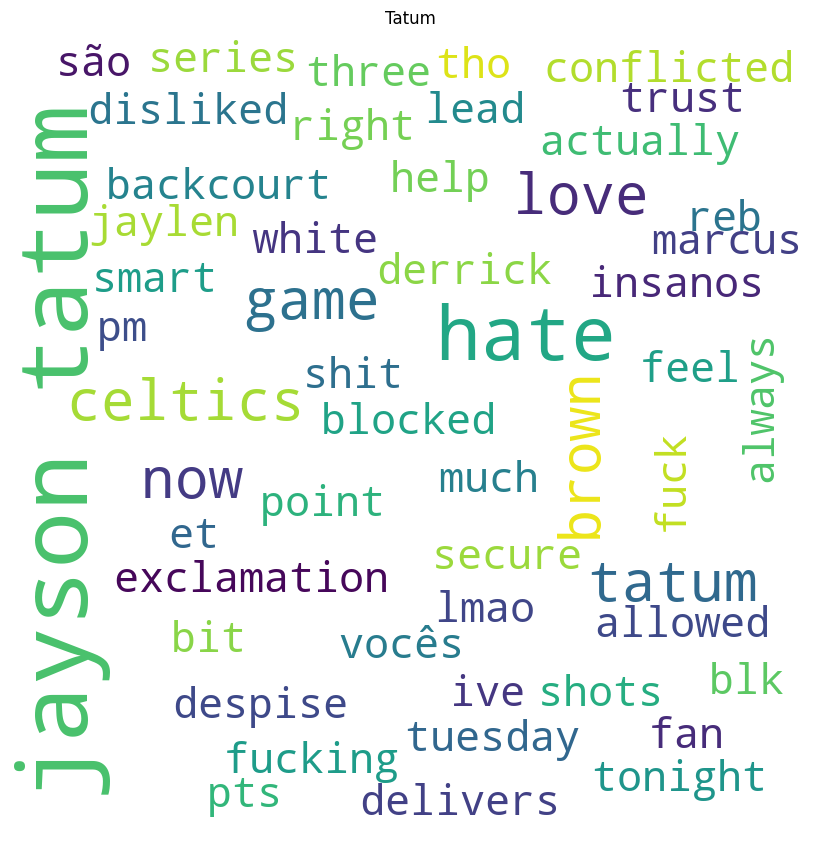

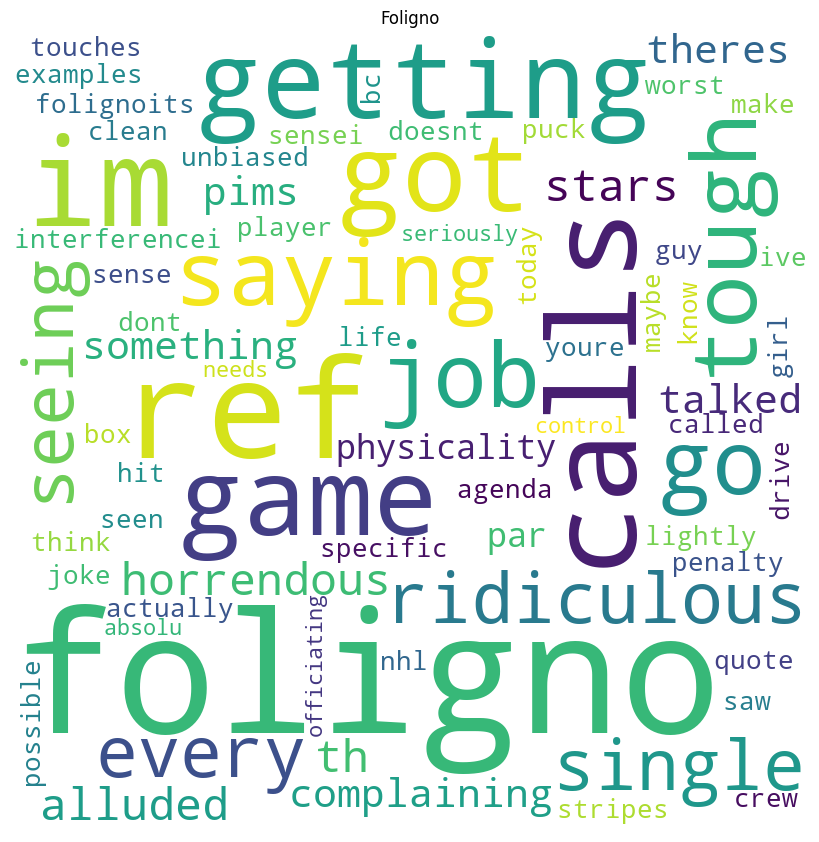

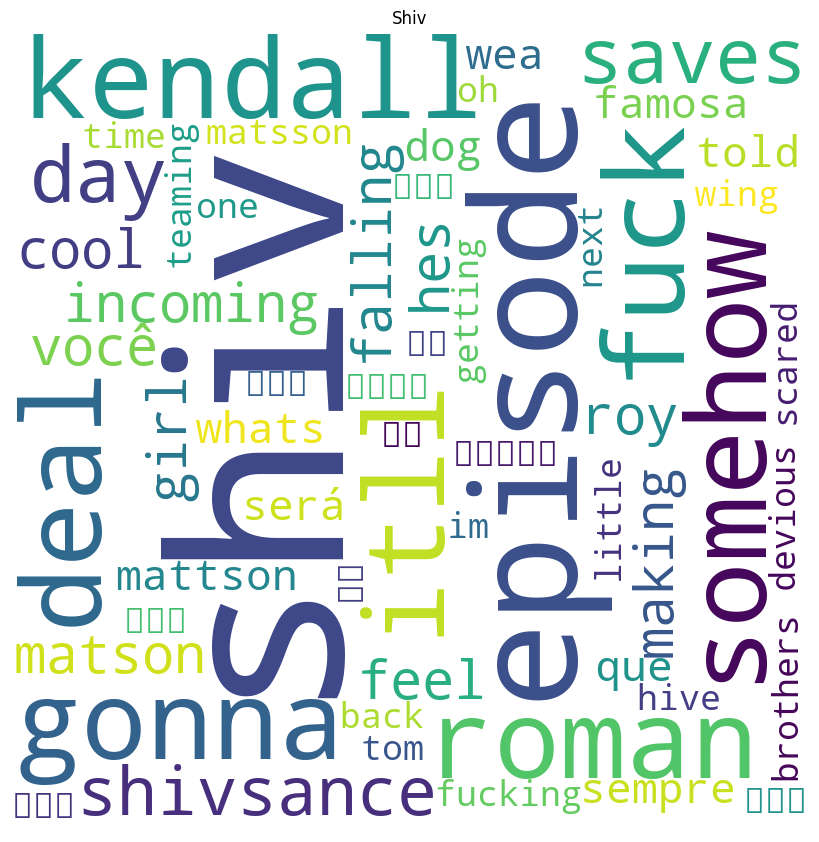

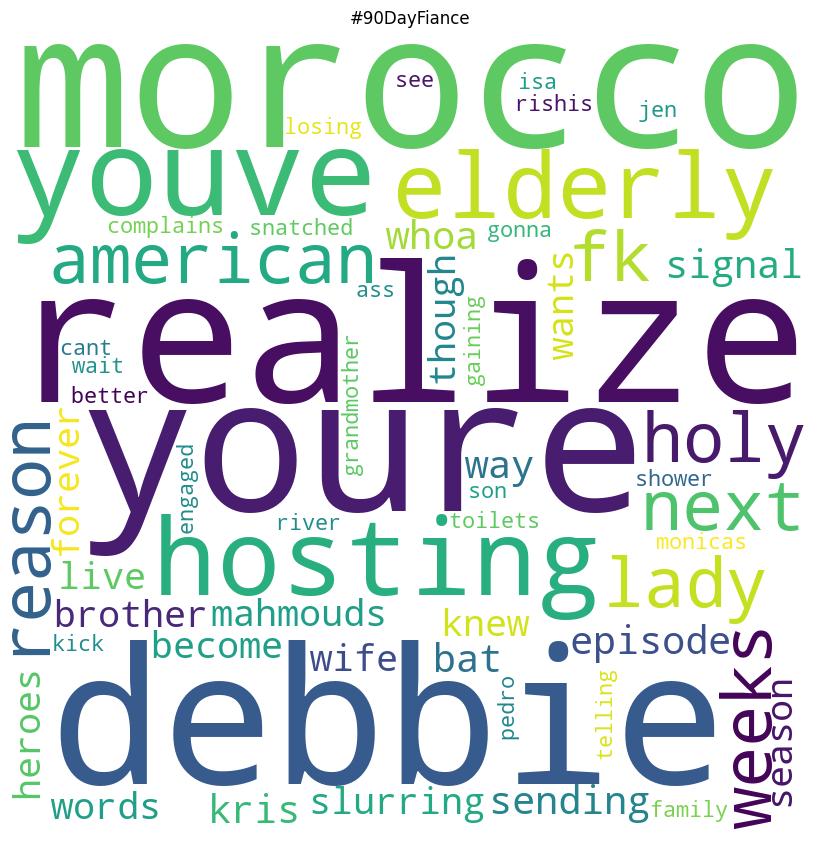

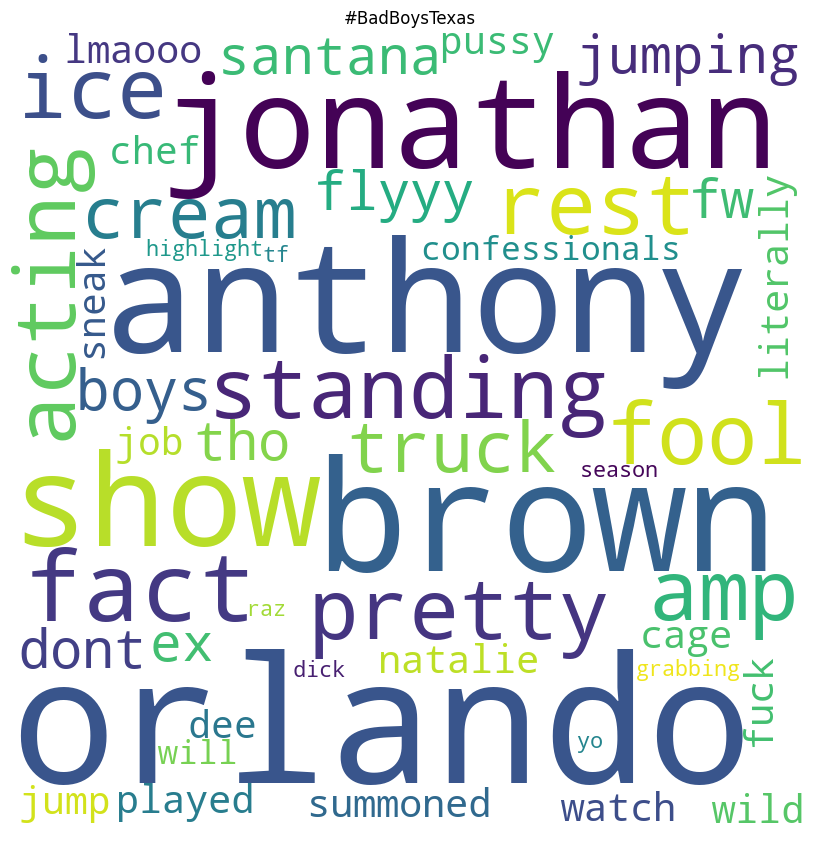

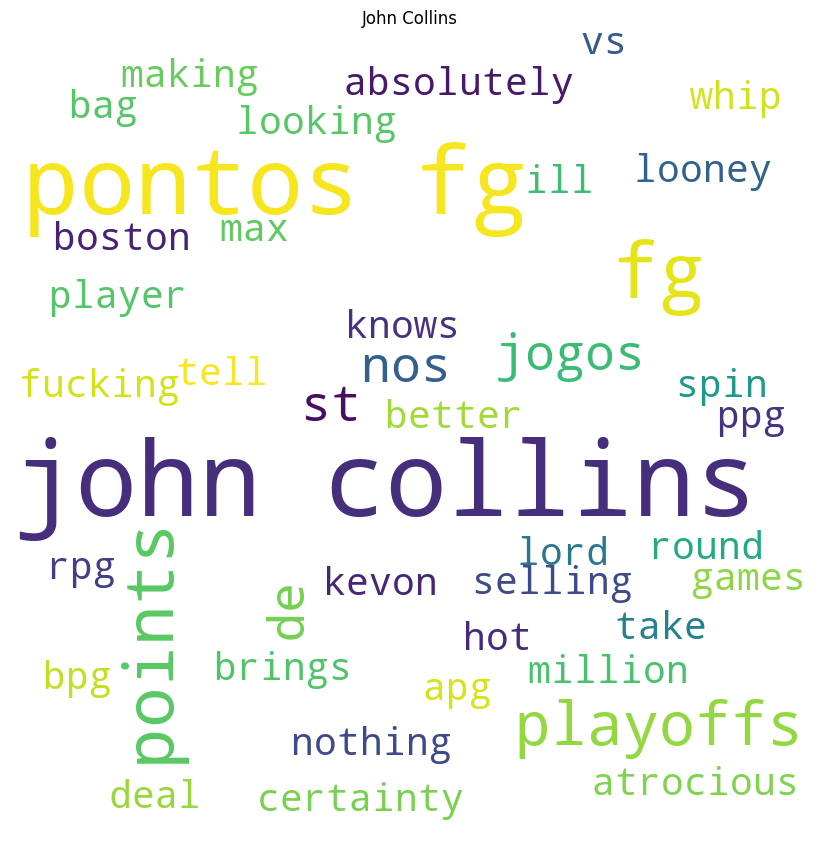

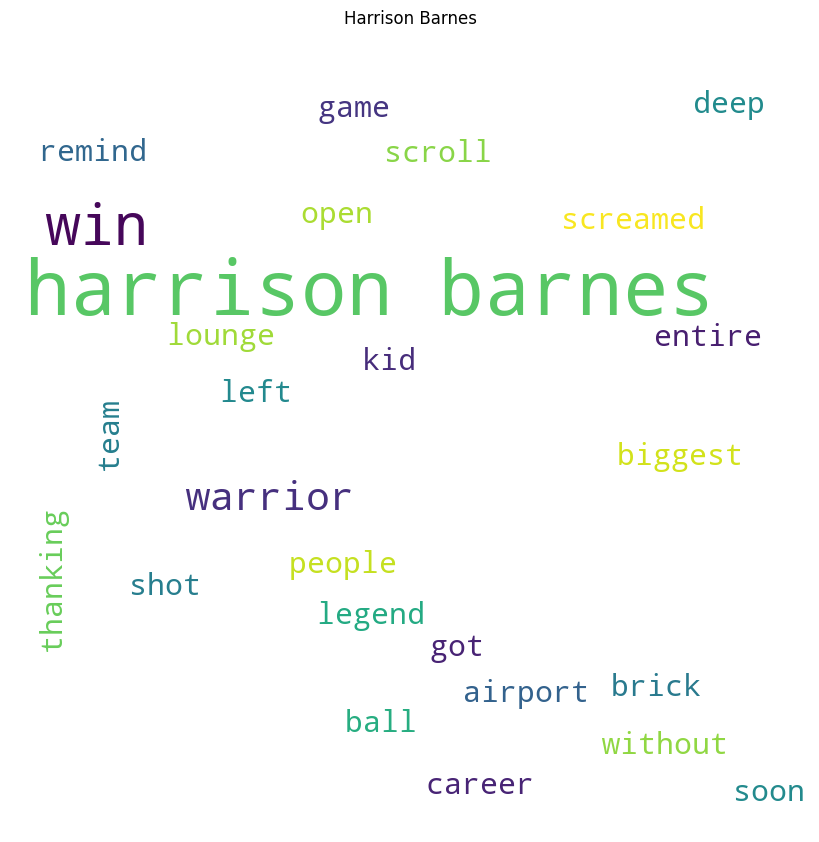

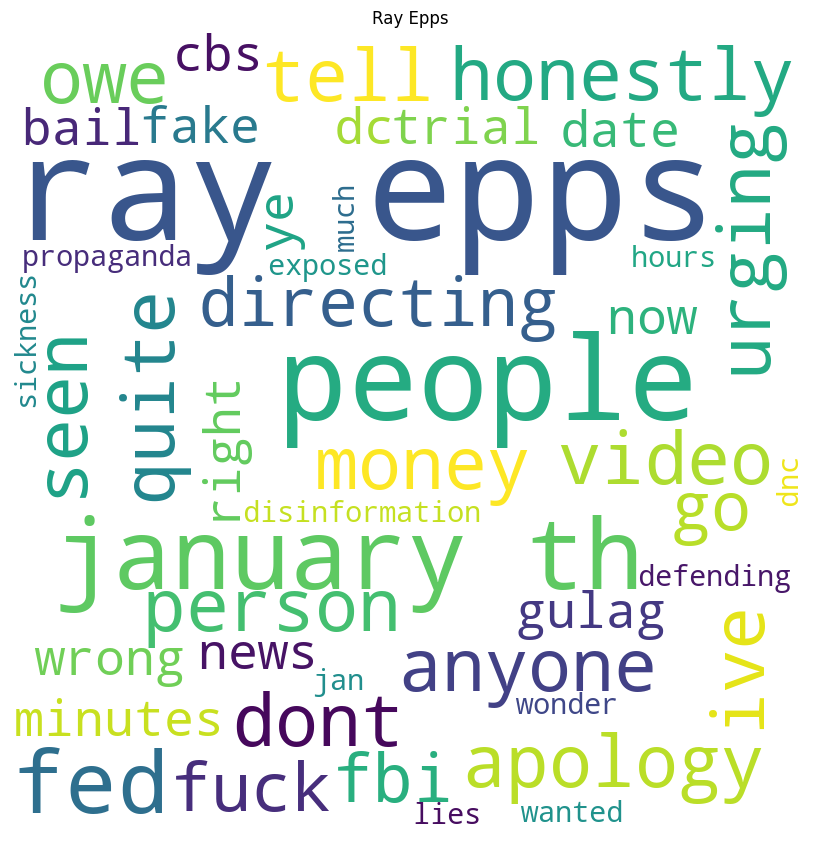

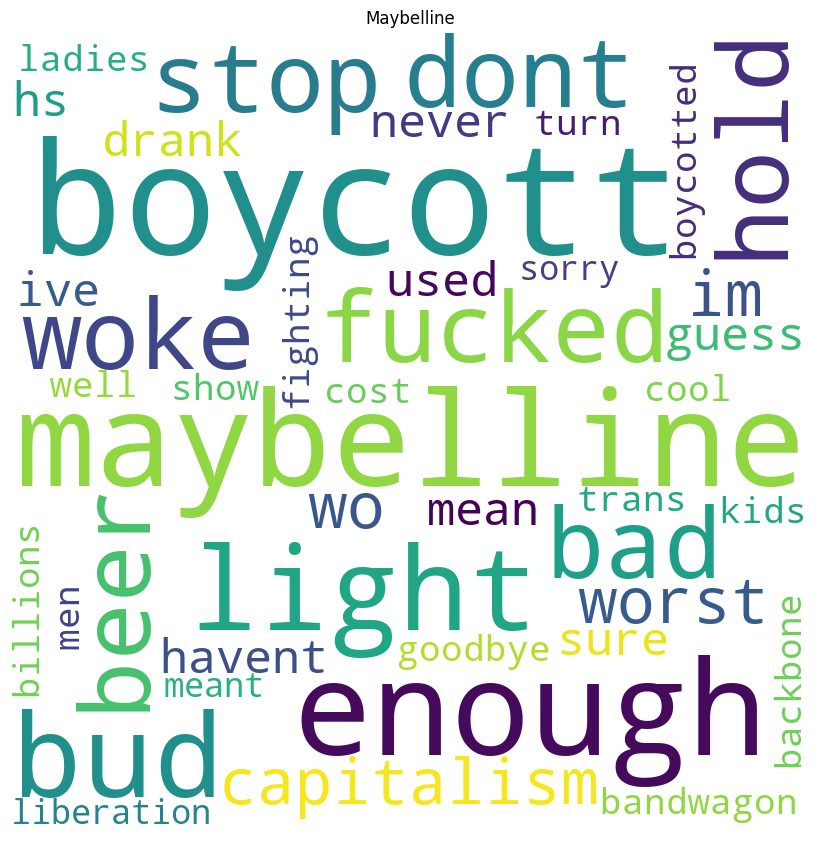

In [93]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for i in tweets.items():
    text = ' '.join(i[1])


    # Generate the word cloud
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    min_font_size = 10).generate(text) 

    # Plot the word cloud
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(i[0])
    # Display the plot
    plt.show() 

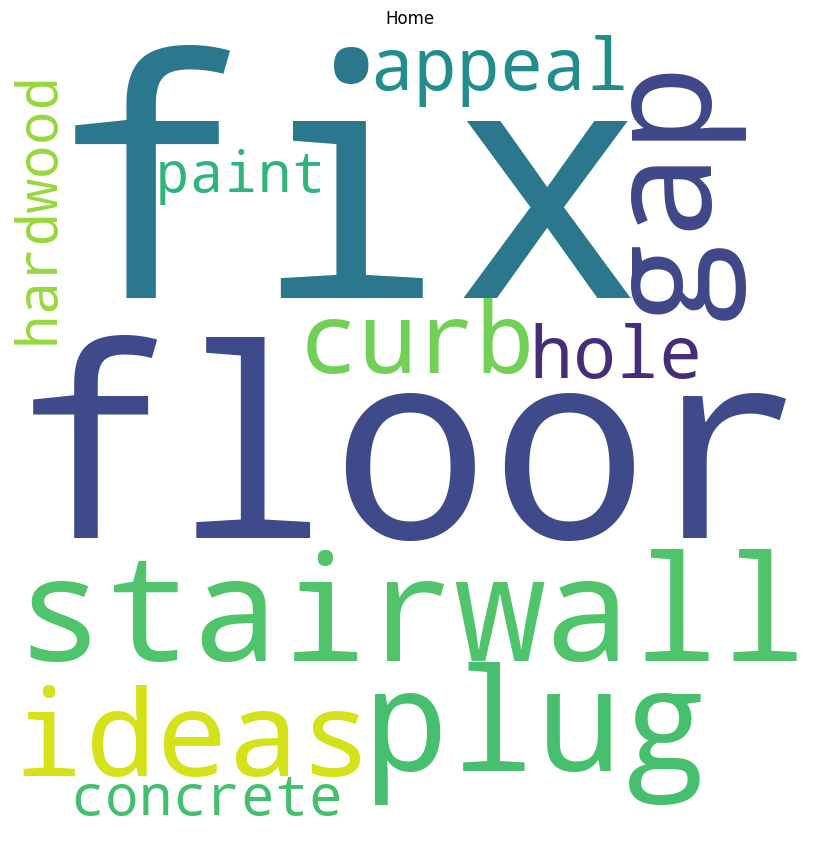

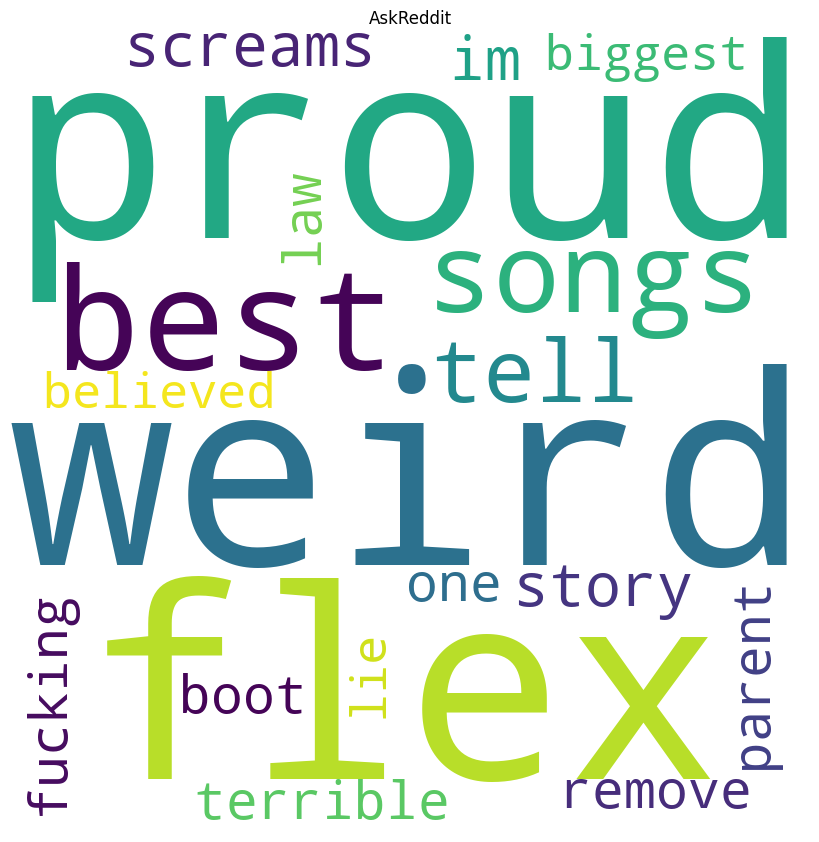

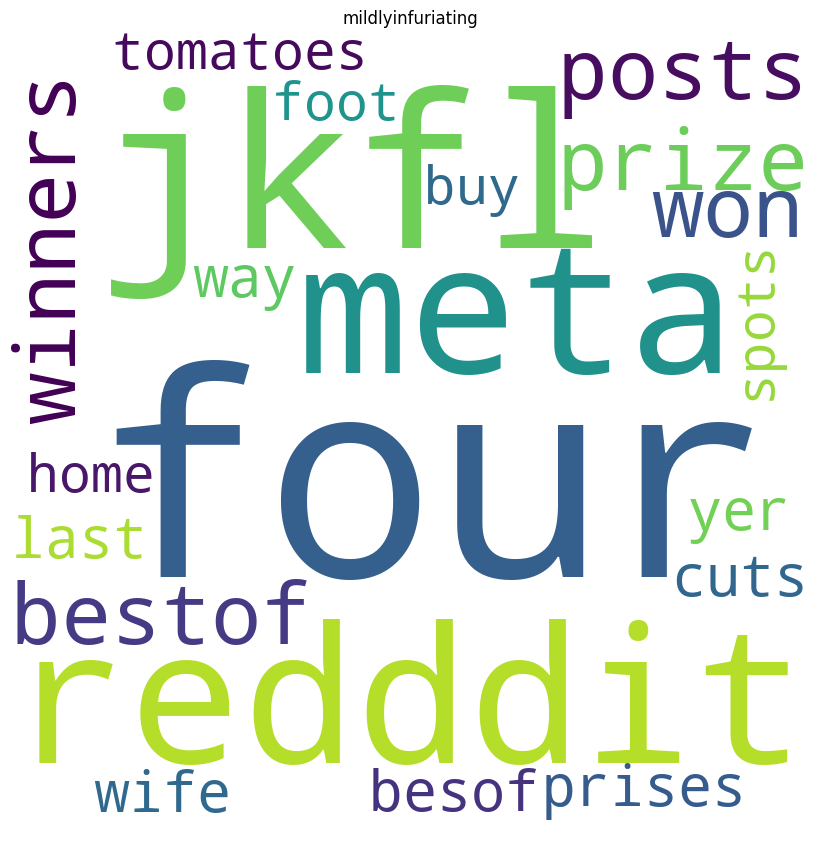

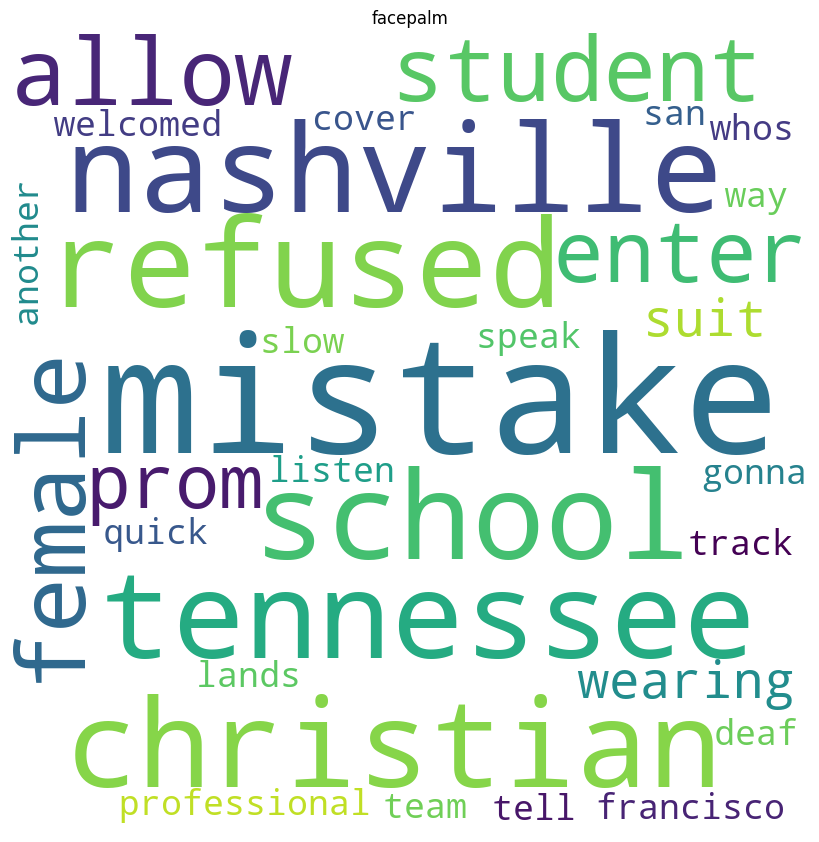

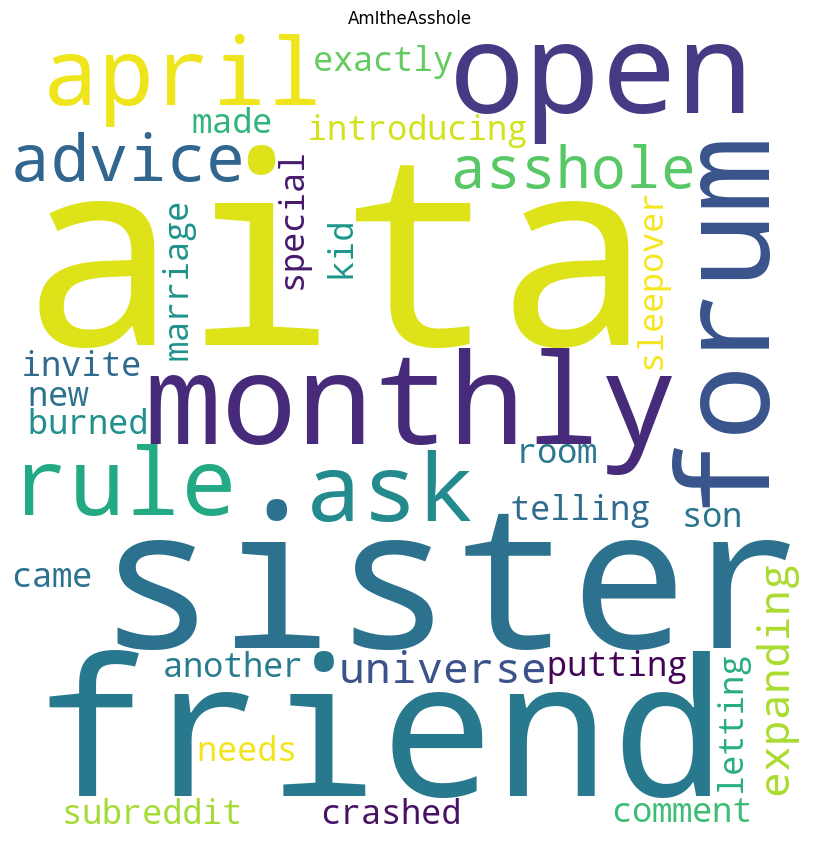

In [95]:
for i in posts_dict.items():
    text = ' '.join(i[1])


    # Generate the word cloud
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    min_font_size = 10).generate(text) 

    # Plot the word cloud
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(i[0])
    # Display the plot
    plt.show() 

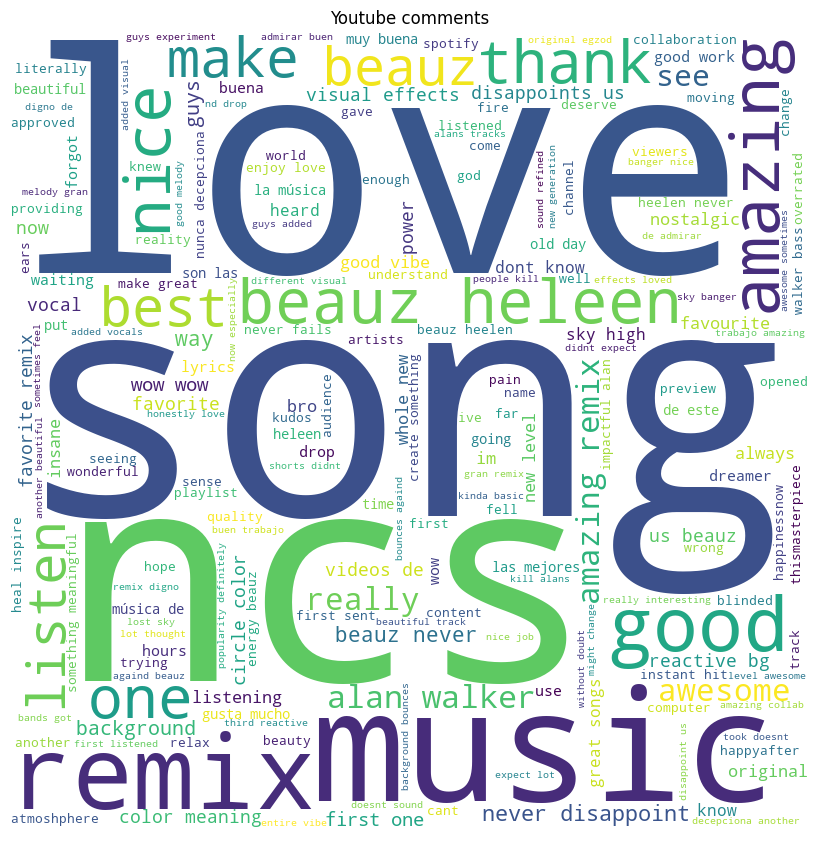

In [96]:

text = ' '.join(comments_list)


# Generate the word cloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(text) 

# Plot the word cloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Youtube comments")
# Display the plot
plt.show() 